In [1]:
import numpy as np
import pandas as pd 


df = pd.read_csv('xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
df.head()

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2]:
df=df.drop(['NationalITy','PlaceofBirth','ParentAnsweringSurvey'],axis=1)

In [3]:
print(df.shape)

(480, 14)


In [4]:
df.isnull().sum()

gender                      0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
df.groupby(['gender']).mean()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
gender,,,,
F,52.862857,64.000000,39.748571,47.828571
M,43.281967,49.518033,36.868852,40.675410


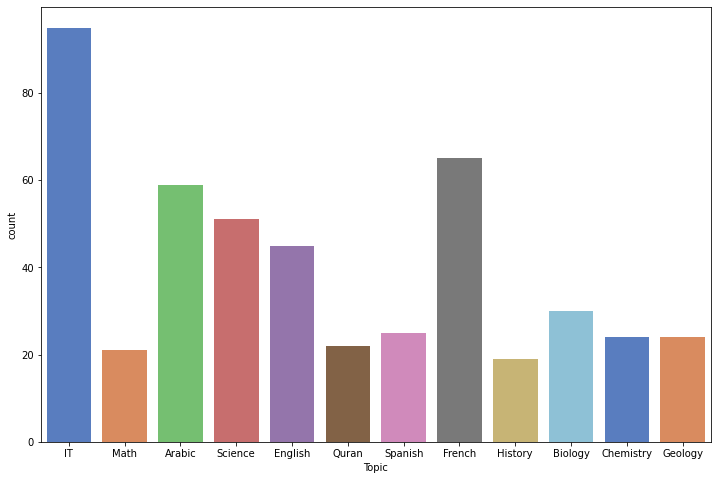

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
plt.figure(figsize=(12,8))
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

In [7]:
df['Failed'] = np.where(df['Class']=='L',1,0)

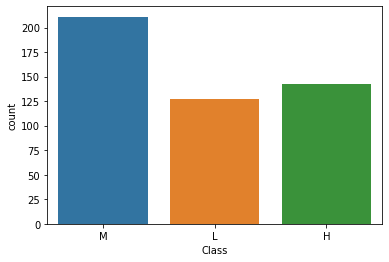

In [8]:
sns.countplot(x='Class',data=df)
plt.show()

In [9]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

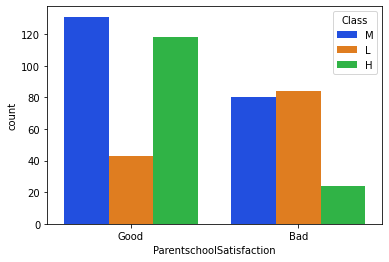

In [10]:
sns.countplot(x='ParentschoolSatisfaction',data = df, hue='Class',palette='bright')
plt.show()

In [11]:
df.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed
Topic,,,,,
Arabic,32.0,65.0,41.0,38.0,0
Biology,78.5,88.5,54.0,47.0,0
Chemistry,79.0,84.5,47.0,30.5,0
English,55.0,50.0,33.0,36.0,0
French,35.0,80.0,23.0,21.0,0
Geology,80.0,82.0,68.5,60.5,0
History,69.0,84.0,72.0,65.0,0
IT,20.0,25.0,10.0,40.0,0
Math,28.0,15.0,19.0,40.0,0


In [12]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>],
       [<AxesSubplot:title={'center':'Failed'}>,
        <AxesSubplot:title={'center':'AbsBoolean'}>]], dtype=object)

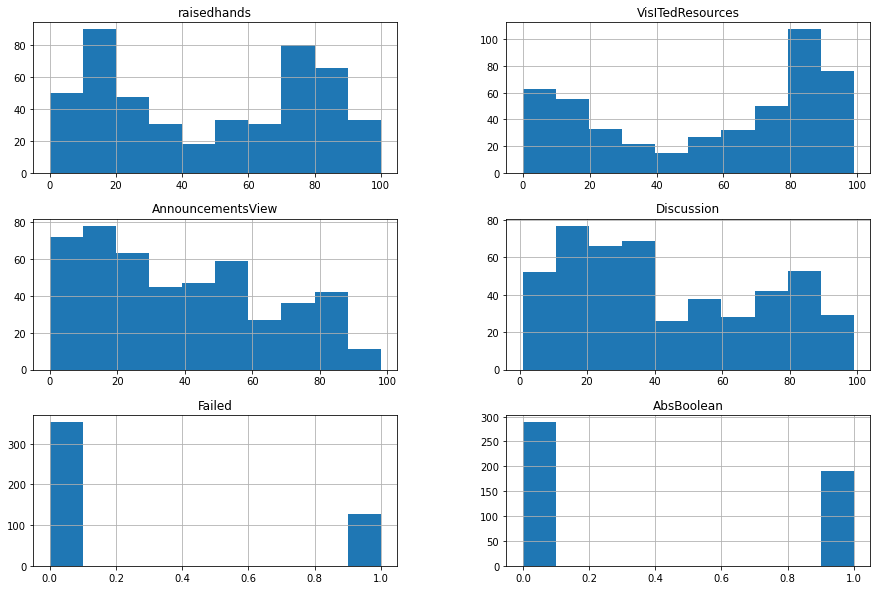

In [13]:
df.hist(figsize=(15,10))

<AxesSubplot:>

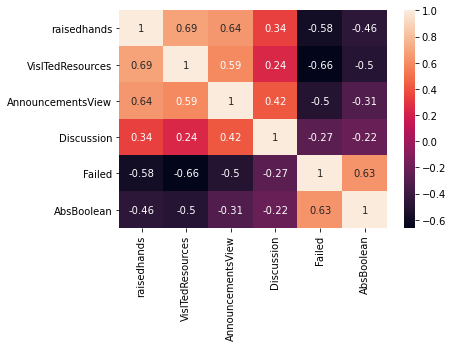

In [14]:
sns.heatmap(df.corr(),annot= True)

In [15]:
df.head(2)

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,Failed,AbsBoolean
0,M,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Good,Under-7,M,0,0
1,M,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Good,Under-7,M,0,0


In [16]:
df=pd.get_dummies(df,columns=['gender','StageID','GradeID','SectionID','Topic',
                                'Semester','Relation','ParentschoolSatisfaction','StudentAbsenceDays'])

In [17]:
df['Class']=df['Class'].replace({"L":0,"M":1,"H":2})

In [18]:
y=df['Class']
df=df.drop('Class',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
         df, y, test_size=0.3, random_state=0)


In [20]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 31


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.78


In [24]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier()
rand_for.fit(X_train_std, y_train)

y_pred = rand_for.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 28


In [25]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81


In [28]:
from sklearn.linear_model import LogisticRegression

rand_for = LogisticRegression()
rand_for.fit(X_train_std, y_train)

y_pred = rand_for.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 26


In [29]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [30]:
from sklearn.tree import DecisionTreeClassifier 

rand_for = DecisionTreeClassifier()
rand_for.fit(X_train_std, y_train)

y_pred = rand_for.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 27


In [31]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81
